In [2]:
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.arbitrage_check import arbitrage_check

In [9]:
F=[0.02,0.02]
vol=0.4
beta=0.9
rho=0
nu=0.5
alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([10,20])
spread = np.arange(0.0001,0.1,0.01)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)

ivol = []
sabr=SABR_model(beta,rho,nu)
vols = sabr.ivol_matrix(alpha,F,K,expiry,method='Hagan')
print('Lognormal implied vols using Lognormal Hagan:')
vols

Lognormal implied vols using Lognormal Hagan:


,0,1,2,3,4,5,6,7,8,9
0,0.483482,0.493793,0.519601,0.545544,0.568896,0.589537,0.607822,0.624142,0.638831,0.652155
1,0.567062,0.579146,0.609409,0.639830,0.667215,0.691418,0.712861,0.731998,0.749222,0.764847


In [10]:
arb=arbitrage_check(beta,rho,nu)
arb.arbitrage(0.001,F,K,expiry,0,1,0.0001,'Hagan','lognormal')

SABR volatility method: Hagan
volatility distribution: lognormal
Expiry= 10 Strike price= 0.0201 c.d.f= 0.0 p.d.f= 0.0 Yes
Expiry= 10 Strike price= 0.0301 c.d.f= 0.0 p.d.f= 0.0 Yes
Expiry= 10 Strike price= 0.0401 c.d.f= 0.0 p.d.f= 0.0 Yes
Expiry= 10 Strike price= 0.0501 c.d.f= -1.14521641057e-245 p.d.f= -1.02899089851e-241 Yes
Expiry= 10 Strike price= 0.0601 c.d.f= -4.66424255133e-175 p.d.f= -3.20041804005e-171 Yes
Expiry= 10 Strike price= 0.0701 c.d.f= -2.70963019878e-136 p.d.f= -1.35038407119e-132 Yes
Expiry= 10 Strike price= 0.0801 c.d.f= -5.12656859872e-112 p.d.f= -1.87229621e-108 Yes
Expiry= 10 Strike price= 0.0901 c.d.f= -1.85409006167e-95 p.d.f= -5.08882823755e-92 Yes
Expiry= 10 Strike price= 0.1001 c.d.f= -1.80600024488e-83 p.d.f= -3.82742606326e-80 Yes
Expiry= 10 Strike price= 0.1101 c.d.f= -2.12639625726e-74 p.d.f= -3.56719758266e-71 Yes
Expiry= 20 Strike price= 0.0201 c.d.f= 0.0 p.d.f= 0.0 Yes
Expiry= 20 Strike price= 0.0301 c.d.f= 0.0 p.d.f= 0.0 Yes
Expiry= 20 Strike price=

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [11]:
pdf=numerical_pdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan','lognormal')

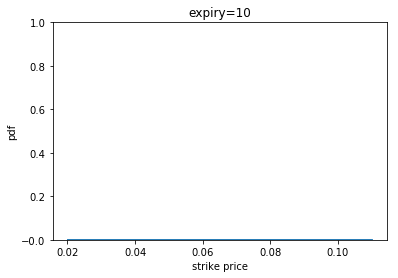

In [13]:
plt.plot(K[0],pdf[0])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=10')
plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

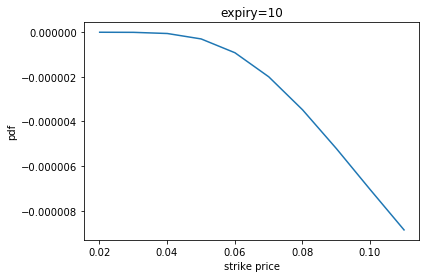

In [14]:
plt.plot(K[0],pdf[0])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=10')
#plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

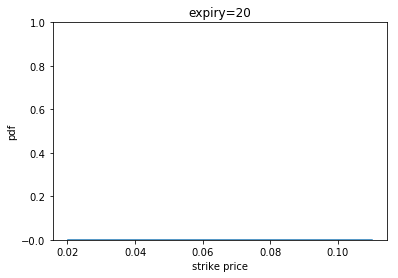

In [15]:
plt.plot(K[1],pdf[1])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=20')
plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

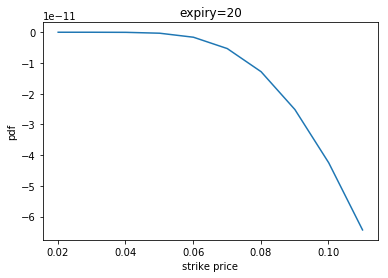

In [16]:
plt.plot(K[1],pdf[1])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()